## CIFAR10 dataset AlexNet 구현


refered https://www.cs.toronto.edu/~kriz/cifar.html


In [2]:
# 기본 Library 선언 및 Tensorflow 버전 확인
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, Input, Activation, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.2.0


In [3]:
# Visualize training results
# 네트워크 학습후 결과를 시각화
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [4]:
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()    

print("cifar10 train : ", train_images.shape)
print("cifar10 test  : ", test_images.shape)

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


170500096/170498071 [==============================] - 6s 0us/step
cifar10 train :  (50000, 32, 32, 3)
cifar10 test  :  (10000, 32, 32, 3)


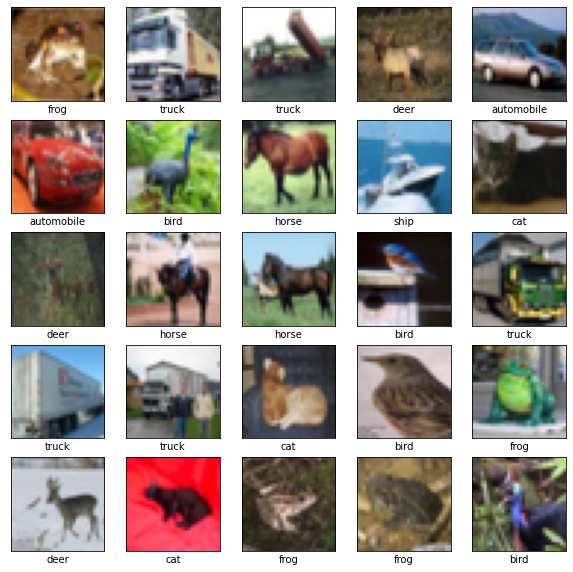

In [5]:
#
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])

In [6]:
#
train_x = train_images
test_x = test_images
train_y = train_labels
test_y = test_labels

print("train : ", train_x.shape)
print("test  : ", test_y.shape)

train :  (50000, 32, 32, 3)
test  :  (10000, 1)


## AlexNet
### CNN 구조 (8 layers)  
* conv layer1 (11X11, 96)
* MaxPool(3)
* BN
* conv layer2 (5X5, 256)
* MaxPool(3)
* BN
* conv layer3 (3X3, 384)
* conv layer4 (3X3, 384)
* conv layer5 (3X3, 256)
* MaxPool(3)
* FC6(4096)
* FC7(4096)
* FC8(10)

### 사용함수 및 hyper parmeter
* activation function : ReLU
* drop out (0.5)
* batch size 128
* optimizer : SGD momentum 0.9
*learning rate : 1e-2(0.01)
* L2  regularization weight decay  : 5e-4


In [7]:
# model 1 hyper parameter
epochs = 20
batch_size = 128

IMG_HEIGHT = 32
IMG_WIDTH = 32

In [8]:
#Create the model
model = Sequential([
    Conv2D(filters=96, kernel_size=11, kernel_regularizer=tf.keras.regularizers.l2(5e-4), 
           input_shape=(32, 32, 3), padding='valid', strides=4),
    MaxPooling2D(pool_size=(3, 3), padding='same'),
    BatchNormalization(),
    Dropout(0.5),
    Conv2D(filters=64, kernel_size=5, activation='relu', padding='same',
           kernel_regularizer=keras.regularizers.l2(5e-4)),
    MaxPooling2D(pool_size=(3, 3),padding='same'),
    BatchNormalization(),
    Dropout(0.5),
    Conv2D(filters=384, kernel_size=3, activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(5e-4)),
    Conv2D(filters=384, kernel_size=3, activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(5e-4)),
    Conv2D(filters=256, kernel_size=3, activation='relu', padding='same', kernel_regularizer=keras.regularizers.l2(5e-4)),
    MaxPooling2D(pool_size=(3, 3),padding='same'),

    Flatten(),
    Dense(4096, activation=tf.nn.relu,kernel_regularizer=keras.regularizers.l2(5e-4)),
    Dropout(0.5),
    Dense(4096, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(5e-4)),
    Dropout(0.5),
    Dense(10, activation=tf.nn.softmax)
])

# compile the model
sgdm = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer=sgdm,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 6, 6, 96)          34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 96)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2, 2, 96)          384       
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 64)          153664    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 1, 64)          2

In [ ]:
#Train the model
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=epochs, batch_size=batch_size)

Epoch 1/20
391/391 [==============================] - 7s 18ms/step - loss: 4.8368 - accuracy: 0.1511 - val_loss: 4.6319 - val_accuracy: 0.1923
Epoch 2/20
391/391 [==============================] - 7s 17ms/step - loss: 4.3080 - accuracy: 0.2531 - val_loss: 4.1401 - val_accuracy: 0.3007
Epoch 3/20
391/391 [==============================] - 7s 17ms/step - loss: 3.9963 - accuracy: 0.3177 - val_loss: 4.0166 - val_accuracy: 0.2986
Epoch 4/20
 38/391 [=>............................] - ETA: 5s - loss: 3.8393 - accuracy: 0.3466

In [ ]:
loss, acc = model.evaluate(test_x, test_y,verbose=0)
print("loss=",loss)
print("acc=",acc)

loss= 1.5363258123397827
acc= 0.7001000046730042


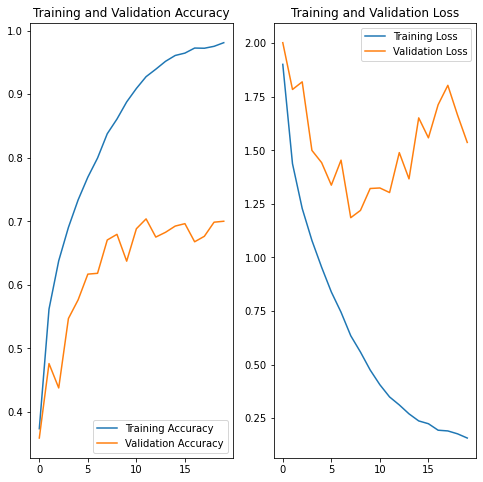

In [ ]:
#Visualize the model
plot_history(history)
